In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings. filterwarnings("ignore", category=FutureWarning)

In [37]:
df_hour = pd.read_csv('hour.csv')
df_day = pd.read_csv('day.csv')
sns.set_style("whitegrid")

In [104]:
df_hour.head()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,...,season_2,season_3,season_4,weathersit_2,weathersit_3,weathersit_4,good_weather,temp_category,hum_category,time_segment
0,1,2011-01-01,0,1,0,0,6,0,0.24,0.2879,...,False,False,False,False,False,False,0,Cold,Humid,Night
1,2,2011-01-01,0,1,1,0,6,0,0.22,0.2727,...,False,False,False,False,False,False,0,Cold,Humid,Night
2,3,2011-01-01,0,1,2,0,6,0,0.22,0.2727,...,False,False,False,False,False,False,0,Cold,Humid,Night
3,4,2011-01-01,0,1,3,0,6,0,0.24,0.2879,...,False,False,False,False,False,False,0,Cold,Humid,Night
4,5,2011-01-01,0,1,4,0,6,0,0.24,0.2879,...,False,False,False,False,False,False,0,Cold,Humid,Night


In [105]:
df_day.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,...,cnt,high_rent_day,cnt_log,temp_scaled,hum_scaled,season_2,season_3,season_4,weathersit_2,weathersit_3
0,1,2011-01-01,0,1,0,6,0,0.344167,0.363625,0.805833,...,985,0,6.893656,-0.826662,1.250171,False,False,False,True,False
1,2,2011-01-02,0,1,0,0,0,0.363478,0.353739,0.696087,...,801,0,6.687109,-0.721095,0.479113,False,False,False,True,False
2,3,2011-01-03,0,1,0,1,1,0.196364,0.189405,0.437273,...,1349,0,7.207860,-1.634657,-1.339274,False,False,False,False,False
3,4,2011-01-04,0,1,0,2,1,0.200000,0.212122,0.590435,...,1562,0,7.354362,-1.614780,-0.263182,False,False,False,False,False
4,5,2011-01-05,0,1,0,3,1,0.226957,0.229270,0.436957,...,1600,0,7.378384,-1.467414,-1.341494,False,False,False,False,False


In [38]:
#feature collection

In [107]:
hour_threshold = df_hour['cnt'].quantile(0.75)
df_hour['high_rent_hour'] = (df_hour['cnt'] >= hour_threshold).astype(int)

high_hour_df = df_hour.groupby('hr')['cnt'].mean().reset_index()
print(high_hour_df)

    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


In [112]:
day_threshold = df_day['cnt'].quantile(0.75)
df_day['high_rent_day'] = (df_day['cnt'] >= day_threshold).astype(int)

high_day_df = df_day.groupby('dteday')['cnt'].mean().reset_index()
print(high_day_df)


         dteday     cnt
0    2011-01-01   985.0
1    2011-01-02   801.0
2    2011-01-03  1349.0
3    2011-01-04  1562.0
4    2011-01-05  1600.0
..          ...     ...
726  2012-12-27  2114.0
727  2012-12-28  3095.0
728  2012-12-29  1341.0
729  2012-12-30  1796.0
730  2012-12-31  2729.0

[731 rows x 2 columns]


In [103]:
df_day.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,...,cnt,high_rent_day,cnt_log,temp_scaled,hum_scaled,season_2,season_3,season_4,weathersit_2,weathersit_3
0,1,2011-01-01,0,1,0,6,0,0.344167,0.363625,0.805833,...,985,0,6.893656,-0.826662,1.250171,False,False,False,True,False
1,2,2011-01-02,0,1,0,0,0,0.363478,0.353739,0.696087,...,801,0,6.687109,-0.721095,0.479113,False,False,False,True,False
2,3,2011-01-03,0,1,0,1,1,0.196364,0.189405,0.437273,...,1349,0,7.207860,-1.634657,-1.339274,False,False,False,False,False
3,4,2011-01-04,0,1,0,2,1,0.200000,0.212122,0.590435,...,1562,0,7.354362,-1.614780,-0.263182,False,False,False,False,False
4,5,2011-01-05,0,1,0,3,1,0.226957,0.229270,0.436957,...,1600,0,7.378384,-1.467414,-1.341494,False,False,False,False,False


In [59]:
df_hour['temp_category'] = pd.cut(
    df_hour['temp'],
    bins=[0, 0.3, 0.6, 1.0],
    labels=['Cold', 'Moderate', 'Hot']
)


In [60]:
df_hour['hum_category'] = pd.cut(
    df_hour['hum'],
    bins=[0, 0.4, 0.7, 1.0],
    labels=['Dry', 'Normal', 'Humid']
)


In [61]:
def time_segment(hr):
    if 7 <= hr <= 9 or 17 <= hr <= 19:
        return 'Peak Hours'
    elif 10 <= hr <= 16:
        return 'Working Hours'
    elif 20 <= hr <= 23:
        return 'Evening'
    else:
        return 'Night'

df_hour['time_segment'] = df_hour['hr'].apply(time_segment)


In [94]:
df_hour[['hr', 'time_segment']].head(10)


,hr,time_segment
0,0,Night
1,1,Night
2,2,Night
3,3,Night
4,4,Night
5,5,Night
6,6,Night
7,7,Peak Hours
8,8,Peak Hours
9,9,Peak Hours


In [89]:
df_hour['time_segment'].value_counts()


time_segment
Working Hours    5099
Night            5001
Peak Hours       4367
Evening          2912
Name: count, dtype: int64

In [91]:
time_segment_df = df_hour.groupby('time_segment')['cnt'].mean().reset_index()
time_segment_df

,time_segment,cnt
0,Evening,154.377747
1,Night,32.321736
2,Peak Hours,331.584841
3,Working Hours,241.902138


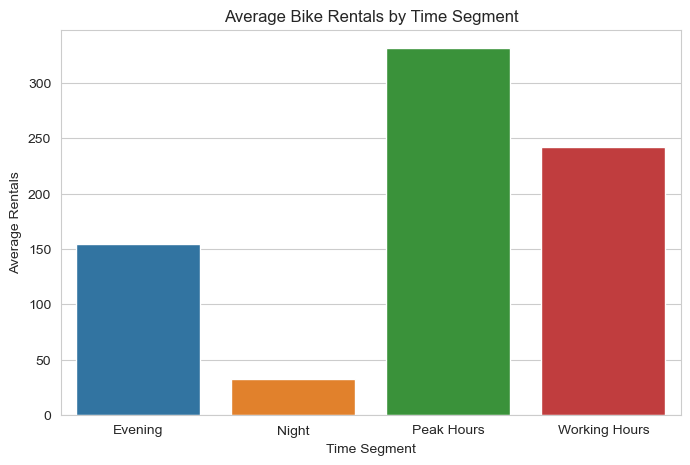

In [92]:
plt.figure(figsize=(8,5))
sns.barplot(data=time_segment_df, x='time_segment', y='cnt')
plt.title('Average Bike Rentals by Time Segment')
plt.xlabel('Time Segment')
plt.ylabel('Average Rentals')
plt.show()

In [62]:
#Feature Transformation

In [95]:
df_hour['cnt_log'] = np.log1p(df_hour['cnt'])
df_day['cnt_log'] = np.log1p(df_day['cnt']) #to avoid the log(0) error

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_hour[['temp_scaled','hum_scaled']] = scaler.fit_transform(df_hour[['temp','hum']])
df_day[['temp_scaled','hum_scaled']] = scaler.fit_transform(df_day[['temp','hum']])


In [70]:
for col in ['season', 'weathersit']:
    if col in df_hour.columns:
        df_hour = pd.get_dummies(df_hour, columns=[col], drop_first=True)

    if col in df_day.columns:
        df_day = pd.get_dummies(df_day, columns=[col], drop_first=True)


In [96]:
corr_hour = df_hour[['cnt','temp','hum','windspeed']].corr()
print(corr_hour) #1 → perfect positive correlation ,-1 → perfect negative correlation,0 → no correlation

                cnt      temp       hum  windspeed
cnt        1.000000  0.404772 -0.322911   0.093234
temp       0.404772  1.000000 -0.069881  -0.023125
hum       -0.322911 -0.069881  1.000000  -0.290105
windspeed  0.093234 -0.023125 -0.290105   1.000000


In [72]:
hour_threshold = df_hour['cnt'].quantile(0.75)
df_hour['high_rent_hour'] = (df_hour['cnt'] >= hour_threshold).astype(int)

In [73]:
print(df_hour[['cnt', 'high_rent_hour']].head())

   cnt  high_rent_hour
0   16               0
1   40               0
2   32               0
3   13               0
4    1               0


In [49]:
high_rent_temp_df = (
    df_hour
    .groupby('high_rent_hour', as_index=False)
    .agg(
        avg_temp=('temp', 'mean'),
        avg_humidity=('hum', 'mean'),
        avg_rentals=('cnt', 'mean')
    )
)

print("\nHigh Renting Hour Summary:")
print(high_rent_temp_df)


High Renting Hour Summary:
   high_rent_hour  avg_temp  avg_humidity  avg_rentals
0               0  0.459008      0.654676   102.811977
1               1  0.610602      0.545122   448.680064


In [75]:
temp_summary_df = df_hour.groupby('temp_category')['cnt'].mean().reset_index()
print(temp_summary_df)


  temp_category         cnt
0          Cold   84.378486
1      Moderate  177.897758
2           Hot  268.663925


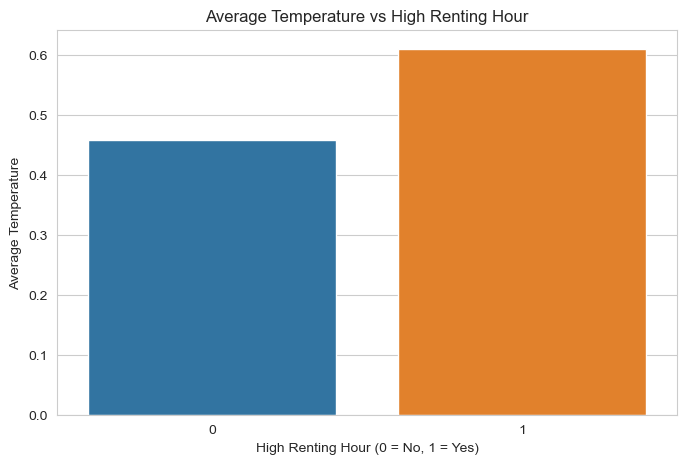

In [78]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=high_rent_temp_df,
    x='high_rent_hour',
    y='avg_temp'
)
plt.title('Average Temperature vs High Renting Hour')
plt.xlabel('High Renting Hour (0 = No, 1 = Yes)')
plt.ylabel('Average Temperature')
plt.show()

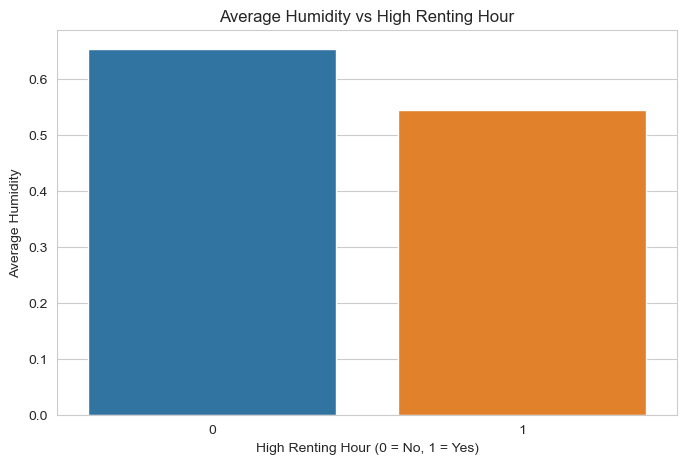

In [77]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=high_rent_temp_df,
    x='high_rent_hour',
    y='avg_humidity'
)
plt.title('Average Humidity vs High Renting Hour')
plt.xlabel('High Renting Hour (0 = No, 1 = Yes)')
plt.ylabel('Average Humidity')
plt.show()

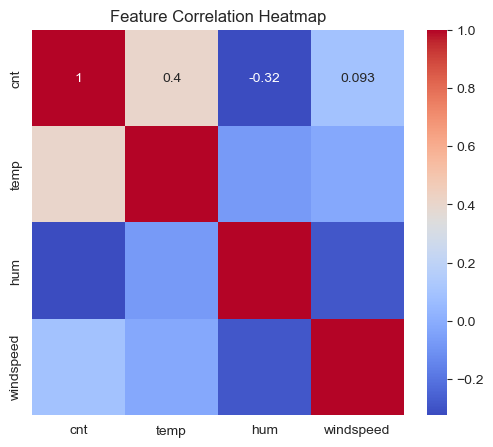

In [79]:
plt.figure(figsize=(6,5))
sns.heatmap(
    df_hour[['cnt','temp','hum','windspeed']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Feature Correlation Heatmap')
plt.show()


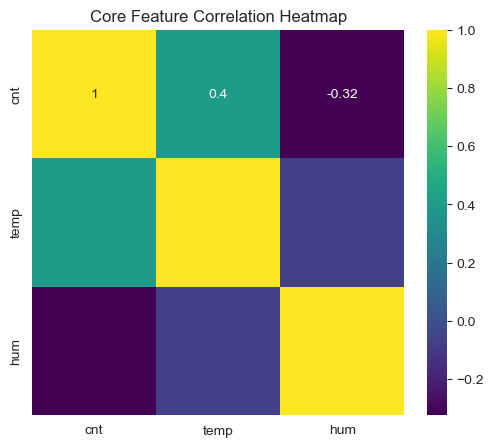

In [80]:
plt.figure(figsize=(6,5))
sns.heatmap(
    df_hour[['cnt','temp','hum']].corr(),
    annot=True,
    cmap='viridis'
)
plt.title('Core Feature Correlation Heatmap')
plt.show()


In [81]:
selected_months = [3, 6, 9, 12]
df_day_filtered = df_day[df_day['mnth'].isin(selected_months)]

month_df = df_day_filtered.groupby('mnth')['cnt'].mean().reset_index()
print(month_df)



   mnth          cnt
0     3  3692.258065
1     6  5772.366667
2     9  5766.516667
3    12  3403.806452


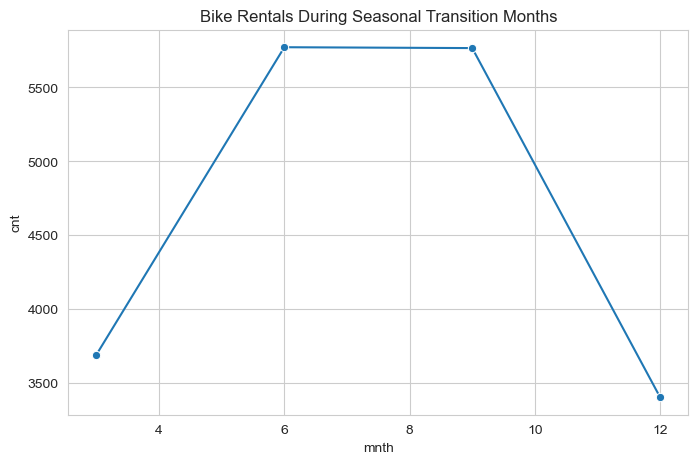

In [82]:
plt.figure(figsize=(8,5))
sns.lineplot(data=month_df, x='mnth', y='cnt', marker='o')
plt.title('Bike Rentals During Seasonal Transition Months')
plt.show()


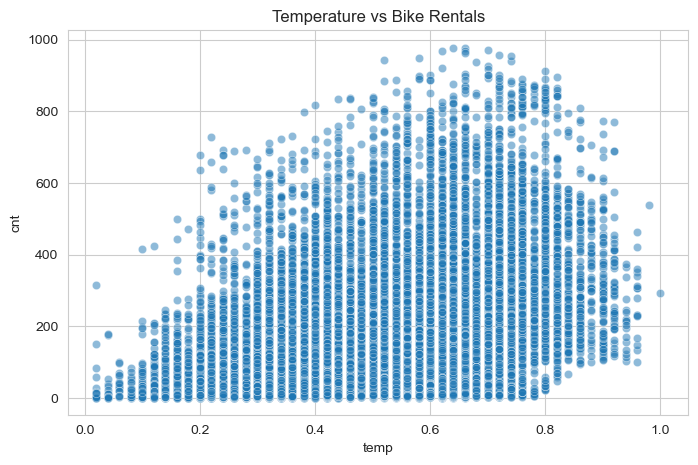

In [58]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_hour, x='temp', y='cnt', alpha=0.5)
plt.title('Temperature vs Bike Rentals')
plt.show()


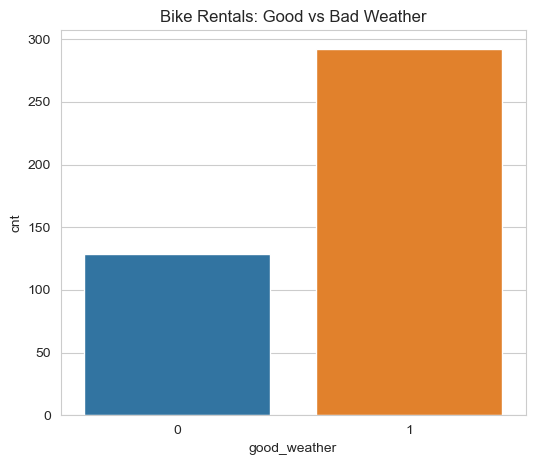

In [83]:
plt.figure(figsize=(6,5))
sns.barplot(data=weather_df, x='good_weather', y='cnt')
plt.title('Bike Rentals: Good vs Bad Weather')
plt.show()
